<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
АЛЕКСЕЙ, рад приветствовать тебя! <br />
<br />    
Несмотря на то, что проект не такой уж и простой как с позиции кода, так и в понимании понятия оттока - <br />тебе удалось сдать его вовремя, это большой плюс для всех нас, спасибо:)<br />
<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт. 
<br>
</font>
<br>
<font color='purple'>
При сдаче любого проекта, хорошая история если будет указана постановка задачи. Любой, кто знакомится с результатами - всегда посмотрит, да и вспомнит, о чём, собственно, речь)))
</font>

#### Постановка задачи
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

In [94]:
import pandas as pd 
import numpy as np
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
from pathlib import Path
path = Path.cwd()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

import lightgbm as lgb

In [95]:
contract = pd.read_csv('{}/data/contract.csv'.format(path))
internet = pd.read_csv('{}/data/internet.csv'.format(path))
personal = pd.read_csv('{}/data/personal.csv'.format(path))
phone = pd.read_csv('{}/data/phone.csv'.format(path))

In [96]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [97]:
internet 

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [98]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [99]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


### План работ:
* Предобработка данных. Поиск дубликатов, изменение типов данных, работа с пропусками
* Сводим всё в одну таблицу. Смотрим статастику по отдельным полям. Пробуем использовать кластеризацию для поиска структуры в данных
* Делаем OHE, добавляем фичи. Уходим от дат к кол-ву месяцев действия договора 
* Перед нами задача классификации, пробуем DecisionTree, RandomForest, LogisticRegression
* Пробуем нейронные сети

# Предобработка данных

#### Contract

In [100]:
contract.duplicated().value_counts()

False    7043
dtype: int64

In [101]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [102]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ОК, ещё можно формат дат при загрузке данных задавать. Посмотри команду  parse_dates)
<br>
</font>

In [103]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'].apply(lambda x: np.nan if x=='No' else x))

In [104]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], downcast='integer', errors='coerce')

In [105]:
contract[contract['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN


In [106]:
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)

In [107]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


* Дубликатов не нашлось
* Есть пропуски в поле TotalCharges, заменили на 0, так как дата договора совпадает с датой актуальности данных - 2020-02-01
* Пропуски в поле EndDate означают что контракт ещё действует. С этими пропусками разберемся ниже
* Поменяли тип данных для BeginDate, EndDate и TotalCharges

 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
С TotalCharges - там нули, и это верно ты подметил, от совершенно "свежих" клиентов. Поэтому их, в общем-то, с чистой совестью можно удалить. Бизнес-смысла они не несут особого. На усмотрение, пока, благо их не много. Если бы их количество было критичным, тогда замена на нули принесла бы нам искажения в модель
<br>
</font>

#### internet 

In [108]:
internet.duplicated().value_counts()

False    5517
dtype: int64

In [109]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [110]:
print(internet.InternetService.value_counts())
print(internet.OnlineSecurity.value_counts())
print(internet.OnlineBackup.value_counts())
print(internet.DeviceProtection.value_counts())
print(internet.TechSupport.value_counts())
print(internet.StreamingTV.value_counts())
print(internet.StreamingMovies.value_counts())

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64
No     3473
Yes    2044
Name: TechSupport, dtype: int64
No     2810
Yes    2707
Name: StreamingTV, dtype: int64
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


Дубликатов нет, пропусков нет

#### Personal

In [111]:
personal.duplicated().value_counts()

False    7043
dtype: int64

In [112]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [113]:
print(personal.gender.value_counts())
print(personal.SeniorCitizen.value_counts())
print(personal.Partner.value_counts())
print(personal.Dependents.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64


In [114]:
personal.rename(columns={"gender": "Gender"}, inplace=True)

* Дубликатов нет, пропусков в данных нет
* Переименовали gender в Gender

#### Phone

In [115]:
phone.duplicated().value_counts()

False    6361
dtype: int64

In [116]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [117]:
print(phone.MultipleLines.value_counts())

No     3390
Yes    2971
Name: MultipleLines, dtype: int64


* Дубликатов нет, пропусков нет

# Объединяем всё в одну таблицу

In [118]:
df = contract.merge(personal, how='left').merge(internet, how='left').merge(phone, how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

In [119]:
df[df['InternetService'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
11,7469-LKBCI,2018-10-01,NaT,Two year,No,Credit card (automatic),18.95,326.80,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
16,8191-XWSZG,2015-10-01,NaT,One year,No,Mailed check,20.65,1022.95,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
21,1680-VDCWW,2019-02-01,NaT,One year,No,Bank transfer (automatic),19.80,202.25,Male,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
22,1066-JKSGK,2019-11-01,2019-12-01,Month-to-month,No,Mailed check,20.15,20.15,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
33,7310-EGVHZ,2020-01-01,NaT,Month-to-month,No,Bank transfer (automatic),20.20,20.20,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,2015-11-01,NaT,Two year,No,Bank transfer (automatic),20.65,1020.75,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7019,9710-NJERN,2016-11-01,NaT,Two year,No,Mailed check,20.15,826.00,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7020,9837-FWLCH,2019-02-01,NaT,Month-to-month,Yes,Electronic check,19.20,239.00,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7030,0871-OPBXW,2019-12-01,NaT,Month-to-month,Yes,Mailed check,20.05,39.25,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Добавим следующие фичи:
* IsInternetConnect - True при наличие записи в файле internet 
* IsPhoneConnect - True при наличие записи в файле phone 
* IsActiveContract - True если поле EndDate пустое
* MonthsContract - количество полных месяцев действия контракта. Если контракт активен, то EndDate считаем 1 февраля 2020г
* BeginDateDiffMonths - разница в месяцах между BeginDate и 1 февраля 2020г

 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
По BeginDateDiffMonths: вопрос на обсуждение, видимо. Это получается, что мы считаем число между датой начала договора по клиенту и какой-то фиксированной датой. Даже по тем клиентам, у которых контракт закончился раньше февраля 2020. Я правильно понял? Тогда, пока, не очень понимаю бизнес-смысл такого числа? Клиент ведь от нас уже ушёл, поэтому февральская дата ни как к нему не относится, вроде бы. <br>
А по тем клиентам, которые остались с нами, данная переменная дожна коррелировать с MonthsContract.<br>
Идею я пониманию, но не хватает аргументов, что бы её принять до конца. может дальше видно будет....)
<br>
</font>

In [120]:
df['IsInternetConnect'] = df['InternetService'].notna()
df['IsPhoneConnect'] = df['MultipleLines'].notna()
df['IsActiveContract'] = df['EndDate'].isna()
df['EndDate'] = df['EndDate'].fillna(datetime.datetime(2020, 2, 1))
df['MonthsContract'] = df.apply(lambda x: (x.EndDate.year - x.BeginDate.year)*12 + (x.EndDate.month - x.BeginDate.month), axis=1)
df['BeginDateDiffMonths'] = df.apply(lambda x: (2020 - x.BeginDate.year)*12 + (2 - x.BeginDate.month), axis=1)

Теперь можно заполнить пропуски в столбцах InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines значением "No"

 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ОК, это хороший ход) поставть No
<br>
</font>

 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'>
Я с вопросом по IsActiveContract:  правильно ли я понимаю, что "1" отмечаются те договора, которые сейчас активны. А "0" помечаются отточники? Если так, то это надо учитывать в моделировании. Привычнее использовать классический вараинт: "1" помечать то, что нужно предсказать)))
<br>
</font>

In [121]:
df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']] = df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']].fillna('No')

Переименуем все True и Yes в 1, а False и No в 0

In [122]:
df[['Dependents', 'Partner', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'IsInternetConnect', 'IsPhoneConnect', 'IsActiveContract']] = df[['Dependents', 'Partner', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'IsInternetConnect', 'IsPhoneConnect', 'IsActiveContract']].replace(['Yes', True, 'No', False], [1, 1, 0, 0])

In [123]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,IsInternetConnect,IsPhoneConnect,IsActiveContract,MonthsContract,BeginDateDiffMonths
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,Female,0,...,0,0,0,0,0,1,0,1,1,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,Male,0,...,1,0,0,0,0,1,1,1,34,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,Male,0,...,0,0,0,0,0,1,1,0,2,4
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,Male,0,...,1,1,0,0,0,1,0,1,45,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,Female,0,...,0,0,0,0,0,1,1,0,2,5


# Посмотрим есть ли аномальные значения или выбросы

Выбросов в MonthlyCharges:  0
Выбросов в TotalCharges:  0
Выбросов в MonthsContract:  0
Выбросов в BeginDateDiffMonths:  0


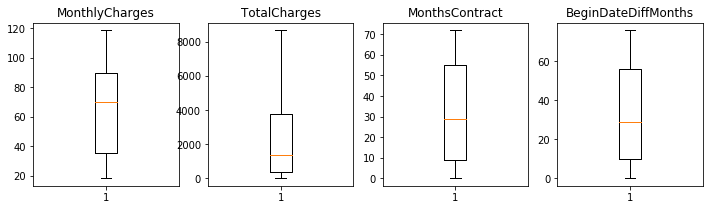

In [124]:
feature_list = ['MonthlyCharges', 'TotalCharges', 'MonthsContract', 'BeginDateDiffMonths']
i=1
plt.figure(figsize=(12, 3))
for feature in feature_list:
    plt.subplot(1, 4, i)
    boxplot = plt.boxplot(df[feature].values)
    plt.title(feature)
    outliers = list(boxplot["fliers"][0].get_data()[1])
    print("Выбросов в {}: ".format(feature), len(outliers))
    i=i+1

 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Хорошая идея по проверке выбросов)<br>
Кстати, на ящиках видно, что monthsContract и BeginDateDiff// мало отличаются друг от друга. Всё-таки близка мультиколлинеарность....
<br>
</font>

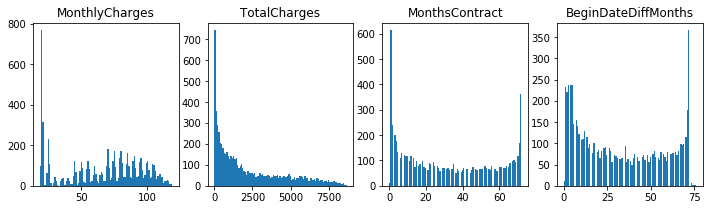

In [125]:
feature_list = ['MonthlyCharges', 'TotalCharges', 'MonthsContract', 'BeginDateDiffMonths']
i=1
plt.figure(figsize=(12, 3))
for feature in feature_list:
    plt.subplot(1, 4, i)
    hist = plt.hist(df[feature].values, bins=100)
    plt.title(feature)
    i=i+1

## Построим корреляционную матрицу

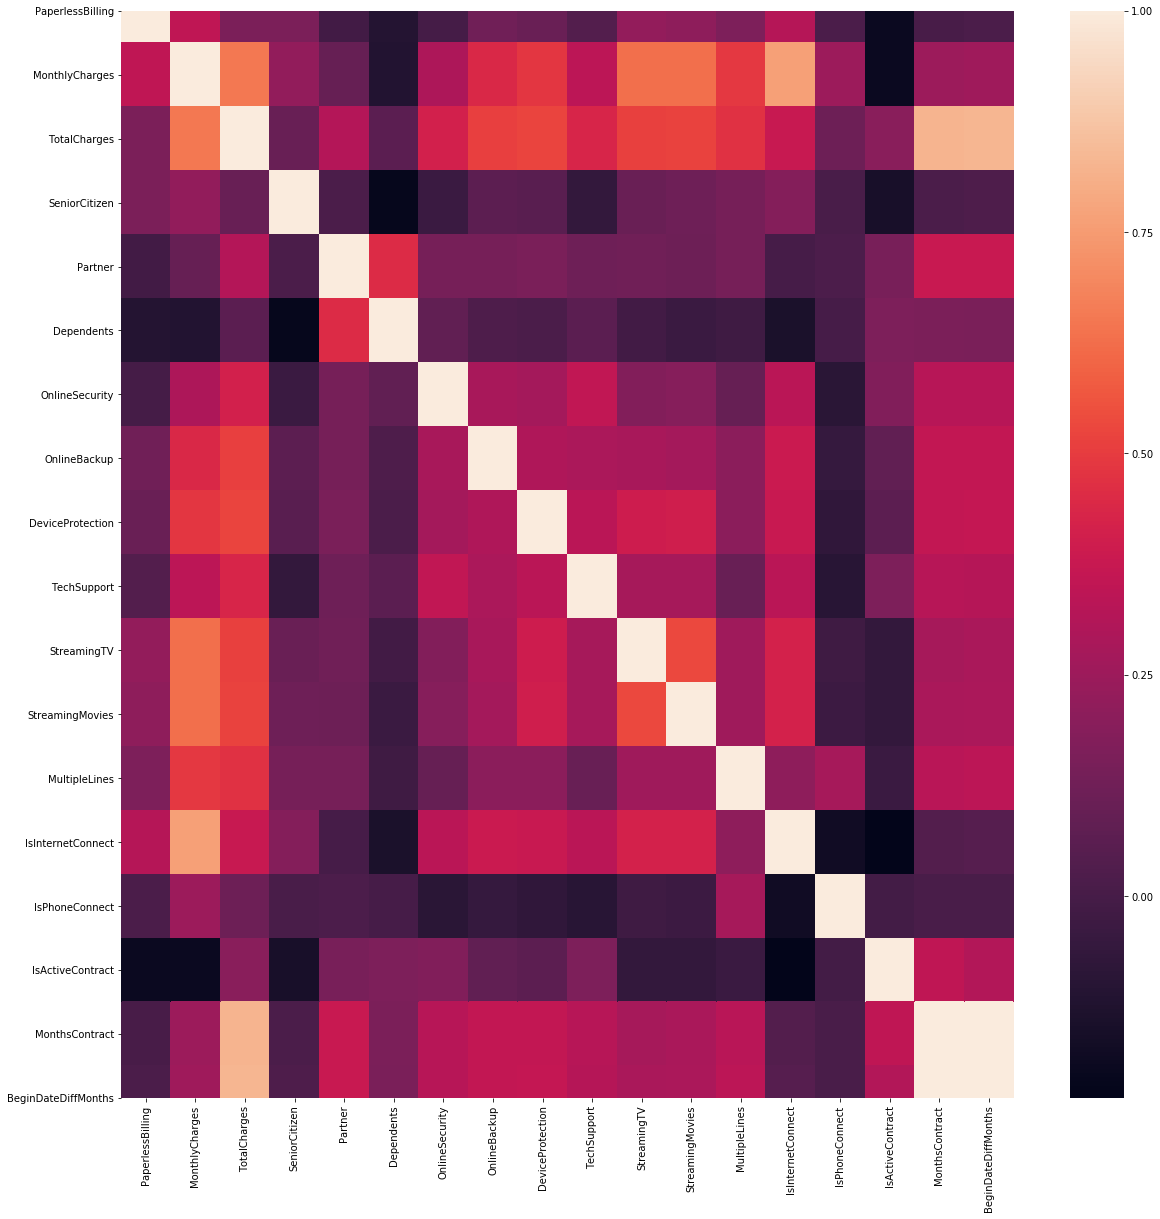

In [126]:
corrMatrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=False)

 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Я опять про две временные переменные: из тепловой карты видим, что у них  корреляция близка к единице)
<br>
</font>

In [127]:
corrMatrix['IsActiveContract'].sort_values(ascending=False)

IsActiveContract       1.000000
MonthsContract         0.352229
BeginDateDiffMonths    0.311744
TotalCharges           0.198324
OnlineSecurity         0.171226
TechSupport            0.164674
Dependents             0.164221
Partner                0.150448
OnlineBackup           0.082255
DeviceProtection       0.066160
IsPhoneConnect        -0.011942
MultipleLines         -0.040102
StreamingMovies       -0.061382
StreamingTV           -0.063228
SeniorCitizen         -0.150889
PaperlessBilling      -0.191825
MonthlyCharges        -0.193356
IsInternetConnect     -0.227890
Name: IsActiveContract, dtype: float64

### Аномальных значений или выбросов нет. IsActiveContract лучше всего коррелирует с MonthsContract и BeginDateDiffMonths

## Делаем OHE

In [128]:
df_ohe = pd.get_dummies(df, drop_first=True, columns=['Type', 'PaymentMethod', 'Gender', 'InternetService'])
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   EndDate                                7043 non-null   datetime64[ns]
 3   PaperlessBilling                       7043 non-null   int64         
 4   MonthlyCharges                         7043 non-null   float64       
 5   TotalCharges                           7043 non-null   float64       
 6   SeniorCitizen                          7043 non-null   int64         
 7   Partner                                7043 non-null   int64         
 8   Dependents                             7043 non-null   int64         
 9   OnlineSecurity                         7043 non-null   int64   

## Для удобства сложим всю предобработку в одну функцию

In [129]:
def preprocessing(BeginDateDiffMonthsStatus):
    contract = pd.read_csv('{}/data/contract.csv'.format(path))
    internet = pd.read_csv('{}/data/internet.csv'.format(path))
    personal = pd.read_csv('{}/data/personal.csv'.format(path))
    phone = pd.read_csv('{}/data/phone.csv'.format(path))

    contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
    contract['EndDate'] = pd.to_datetime(contract['EndDate'].apply(lambda x: np.nan if x=='No' else x))
    contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], downcast='integer', errors='coerce')
    contract['TotalCharges'] = contract['TotalCharges'].fillna(0)
    personal.rename(columns={"gender": "Gender"}, inplace=True)

    df = contract.merge(personal, how='left').merge(internet, how='left').merge(phone, how='left')

    df['IsInternetConnect'] = df['InternetService'].notna()
    df['IsPhoneConnect'] = df['MultipleLines'].notna()
    df['IsActiveContract'] = df['EndDate'].isna()
    df['EndDate'] = df['EndDate'].fillna(datetime.datetime(2020, 2, 1))
    df['MonthsContract'] = df.apply(lambda x: (x.EndDate.year - x.BeginDate.year)*12 + (x.EndDate.month - x.BeginDate.month), axis=1)
    if BeginDateDiffMonthsStatus == True:
        df['BeginDateDiffMonths'] = df.apply(lambda x: (2020 - x.BeginDate.year)*12 + (2 - x.BeginDate.month), axis=1)

    df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']] = df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']].fillna('No')

    df[['Dependents', 'Partner', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'IsInternetConnect', 'IsPhoneConnect', 'IsActiveContract']] = df[['Dependents', 'Partner', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'IsInternetConnect', 'IsPhoneConnect', 'IsActiveContract']].replace(['Yes', True, 'No', False], [1, 1, 0, 0])

    df_ohe = pd.get_dummies(df, drop_first=True, columns=['Type', 'PaymentMethod', 'Gender', 'InternetService'])
    return df_ohe

def standart_scalar(train, valid, test, BeginDateDiffMonthsStatus):
    scaler = StandardScaler()
    if BeginDateDiffMonthsStatus == True:
        columns = ['MonthlyCharges', 'TotalCharges', 'MonthsContract', 'BeginDateDiffMonths']
    else:
        columns = ['MonthlyCharges', 'TotalCharges', 'MonthsContract']
    # columns = ['MonthlyCharges', 'TotalCharges', 'MonthsContract']
    train[columns] = scaler.fit_transform(train[columns])
    valid[columns] = scaler.transform(valid[columns])
    test[columns] = scaler.transform(test[columns])
    return train, valid, test

def train_valid_test_split(df):
    features = df.drop(columns=['customerID', 'BeginDate', 'EndDate', 'IsActiveContract'])
    target = df['IsActiveContract']
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12345)
    features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, test_size=0.5, random_state=12345)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

## Построим модель логистической регрессии

In [130]:
df = preprocessing(True)
features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(df)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(4225, 25)
(1409, 25)
(1409, 25)


 <font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Всё ОК. Но...
<br>
</font>
<font color='purple'>
Есть один момент, который хотел бы осветитью Дело касается балансировки данных. Сейчас так: сначала разбивка на тест, обучение, валидную выборку. Потом в самой модели ожидается балансировка. Однако, возможны случаи, когда (чисто случайно) окажется такая картинка: в группах будет разное количество факторов (столбцов). Это возникает по той причине, что у нас есть бинарные факторы с "0" и "1". И они могут распределиться раздельно по группам.<br>
Сейчас не критично, а в целом, лучше проводить ручную балансироку ДО разбиения на тест и трейн.
<br>
</font>

### Нормализуем features

In [131]:
features_train, features_valid, features_test = standart_scalar(features_train, features_valid, features_test, True)

In [132]:
model = LogisticRegression(class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_valid, predictions_valid)))

The AUC-ROC of prediction is:0.90


## Построим модель RandomForest

In [133]:
df = preprocessing(True)
features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(df)
features_train, features_valid, features_test = standart_scalar(features_train, features_valid, features_test, True)

In [134]:
for n_estimators in range(600, 800, 100):
    for max_depth in range(6, 8, 1):
        for min_samples_split in range(7, 9, 1):
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split= min_samples_split, class_weight='balanced', random_state=12345)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            roc_auc = roc_auc_score(target_valid, predictions)
            print('AUC-ROC= {:.3f}, n_estimators={}, max_depth={}, min_samples_split={}'.format(roc_auc, n_estimators, max_depth, min_samples_split))

AUC-ROC= 0.786, n_estimators=600, max_depth=6, min_samples_split=7
AUC-ROC= 0.782, n_estimators=600, max_depth=6, min_samples_split=8
AUC-ROC= 0.785, n_estimators=600, max_depth=7, min_samples_split=7
AUC-ROC= 0.788, n_estimators=600, max_depth=7, min_samples_split=8
AUC-ROC= 0.783, n_estimators=700, max_depth=6, min_samples_split=7
AUC-ROC= 0.782, n_estimators=700, max_depth=6, min_samples_split=8
AUC-ROC= 0.785, n_estimators=700, max_depth=7, min_samples_split=7
AUC-ROC= 0.788, n_estimators=700, max_depth=7, min_samples_split=8


AUC-ROC = 0.788 при n_estimators=700, max_depth=7, min_samples_split=8

## Пробуем нейронные сети

In [135]:
df = preprocessing(True)
features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(df)
features_train, features_valid, features_test = standart_scalar(features_train, features_valid, features_test, True)

In [136]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.AUC(name='auc')
]

def make_model(metrics = METRICS):
    model = Sequential()
    model.add(Dense(24, activation='relu', input_dim=(features_train.shape[-1])))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='categorical_crossentropy', metrics=metrics)
    return model

In [137]:
EPOCHS = 10

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [138]:
model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                624       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 50        
Total params: 674
Trainable params: 674
Non-trainable params: 0
_________________________________________________________________


In [139]:
train_labels = to_categorical(target_train)
model.fit(features_train, train_labels, epochs=EPOCHS,
          validation_data=(features_valid, to_categorical(target_valid)), verbose=2)

Train on 4225 samples, validate on 1409 samples
Epoch 1/10
 - 0s - loss: 0.6396 - accuracy: 0.5762 - auc: 0.6295 - val_loss: 0.5287 - val_accuracy: 0.7335 - val_auc: 0.7694
Epoch 2/10
 - 0s - loss: 0.5089 - accuracy: 0.7188 - auc: 0.7763 - val_loss: 0.4816 - val_accuracy: 0.7491 - val_auc: 0.8081
Epoch 3/10
 - 0s - loss: 0.4770 - accuracy: 0.7437 - auc: 0.8061 - val_loss: 0.4686 - val_accuracy: 0.7491 - val_auc: 0.8379
Epoch 4/10
 - 0s - loss: 0.4608 - accuracy: 0.7488 - auc: 0.8280 - val_loss: 0.4632 - val_accuracy: 0.7544 - val_auc: 0.8496
Epoch 5/10
 - 0s - loss: 0.4565 - accuracy: 0.7598 - auc: 0.8410 - val_loss: 0.4593 - val_accuracy: 0.7637 - val_auc: 0.8553
Epoch 6/10
 - 0s - loss: 0.4447 - accuracy: 0.7667 - auc: 0.8513 - val_loss: 0.4580 - val_accuracy: 0.7722 - val_auc: 0.8576
Epoch 7/10
 - 0s - loss: 0.4442 - accuracy: 0.7684 - auc: 0.8542 - val_loss: 0.4579 - val_accuracy: 0.7750 - val_auc: 0.8598
Epoch 8/10
 - 0s - loss: 0.4438 - accuracy: 0.7718 - auc: 0.8568 - val_loss: 

In [140]:
probabilities_valid = model.predict(features_valid)
predictions_valid = probabilities_valid[:, 1]
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_valid, predictions_valid)))

The AUC-ROC of prediction is:0.80


Структуру самой сети выбрал наугад. Как её осознанно улучшать пока не разобрался

## Пробуем LightGBM

In [141]:
df = preprocessing(True)
features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(df)
features_train, features_valid, features_test = standart_scalar(features_train, features_valid, features_test, True)

In [142]:
gbm = lgb.LGBMRegressor(num_leaves=8,
                        learning_rate=0.045,
                        n_estimators=40,
                        class_weight='balanced', 
                        max_bin=1000, 
                        num_iterations=1000, 
                        random_state=12345)
gbm.fit(features_train, target_train,
        eval_set=[(features_valid, target_valid)],
        eval_metric='auc',
        early_stopping_rounds=5)

lid_0's l2: 0.074157
[403]	valid_0's auc: 0.966033	valid_0's l2: 0.0739045
[404]	valid_0's auc: 0.966205	valid_0's l2: 0.0736755
[405]	valid_0's auc: 0.96626	valid_0's l2: 0.0735986
[406]	valid_0's auc: 0.966316	valid_0's l2: 0.0735558
[407]	valid_0's auc: 0.966453	valid_0's l2: 0.0734307
[408]	valid_0's auc: 0.966544	valid_0's l2: 0.0733355
[409]	valid_0's auc: 0.966942	valid_0's l2: 0.0729331
[410]	valid_0's auc: 0.966911	valid_0's l2: 0.0728799
[411]	valid_0's auc: 0.967	valid_0's l2: 0.0727346
[412]	valid_0's auc: 0.967013	valid_0's l2: 0.0727037
[413]	valid_0's auc: 0.967428	valid_0's l2: 0.0722665
[414]	valid_0's auc: 0.967625	valid_0's l2: 0.0721112
[415]	valid_0's auc: 0.96762	valid_0's l2: 0.0720287
[416]	valid_0's auc: 0.967676	valid_0's l2: 0.07198
[417]	valid_0's auc: 0.967795	valid_0's l2: 0.0718622
[418]	valid_0's auc: 0.967896	valid_0's l2: 0.0717494
[419]	valid_0's auc: 0.968069	valid_0's l2: 0.0715149
[420]	valid_0's auc: 0.968064	valid_0's l2: 0.0715012
[421]	valid_0'

LGBMRegressor(boosting_type='gbdt', class_weight='balanced',
              colsample_bytree=1.0, importance_type='split',
              learning_rate=0.045, max_bin=1000, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=40, n_jobs=-1, num_iterations=1000, num_leaves=8,
              objective=None, random_state=12345, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [143]:
predictions_valid = gbm.predict(features_valid, num_iteration=gbm.best_iteration_)
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_valid, predictions_valid)))

The AUC-ROC of prediction is:0.98


AUC-ROC 0.98. Кажется у нас победитель

In [144]:
predictions_test = gbm.predict(features_test, num_iteration=gbm.best_iteration_)
# eval
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_test, predictions_test)))

The AUC-ROC of prediction is:0.99


## AUC-ROC неожиданно оказался почти 1. Фича BeginDateDiffMonths сильно улучшает итоговый скор. Не виже причин почему её нельзя использовать, но если нельзя, то ниже рассчёт без неё(AUC-ROC = 0.83)

In [145]:
df = preprocessing(False)
features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(df)
features_train, features_valid, features_test = standart_scalar(features_train, features_valid, features_test, False)
gbm = lgb.LGBMRegressor(num_leaves=8,
                        learning_rate=0.045,
                        n_estimators=40,
                        class_weight='balanced', 
                        max_bin=1000, 
                        num_iterations=1000, 
                        random_state=12345)
gbm.fit(features_train, target_train,
        eval_set=[(features_valid, target_valid)],
        eval_metric='auc',
        early_stopping_rounds=5)
predictions_valid = gbm.predict(features_valid, num_iteration=gbm.best_iteration_)
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_valid, predictions_valid)))

[1]	valid_0's auc: 0.812479	valid_0's l2: 0.242835
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.81436	valid_0's l2: 0.236298
[3]	valid_0's auc: 0.814355	valid_0's l2: 0.230394
[4]	valid_0's auc: 0.815494	valid_0's l2: 0.225092
[5]	valid_0's auc: 0.817236	valid_0's l2: 0.220308
[6]	valid_0's auc: 0.81719	valid_0's l2: 0.215953
[7]	valid_0's auc: 0.817727	valid_0's l2: 0.211956
[8]	valid_0's auc: 0.817461	valid_0's l2: 0.208424
[9]	valid_0's auc: 0.818358	valid_0's l2: 0.205153
[10]	valid_0's auc: 0.819394	valid_0's l2: 0.202431
[11]	valid_0's auc: 0.819656	valid_0's l2: 0.199982
[12]	valid_0's auc: 0.819509	valid_0's l2: 0.197566
[13]	valid_0's auc: 0.823069	valid_0's l2: 0.19538
[14]	valid_0's auc: 0.823193	valid_0's l2: 0.193319
[15]	valid_0's auc: 0.823476	valid_0's l2: 0.191568
[16]	valid_0's auc: 0.823754	valid_0's l2: 0.189902
[17]	valid_0's auc: 0.825376	valid_0's l2: 0.188377
[18]	valid_0's auc: 0.82594	valid_0's l2: 0.187046
[19]	valid_0's au

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
<br>
АЛЕКСЕЙ, на самом деле хорошая, вдумчивая работа.<br>
Понятный и логичной код с комментариями,  порядок изложения также ясный, корректная работа с моделями - чувствуется, что наработалась аналитическая дисциплина) и это сильно будет помогать тебе в твоей работе в этом направлении.<br>
А если чувствуешь, что нехватает ещё опыта - это хорошо. Значит верно движешься - критика к себе, это хорошо)<br><br>
Я говорил, что в целом проект мне понравился, однако, есть три момента, на которые хотел обратить внимание:<br><BR>
1) Обозначение целевой переменной: в этой работе произошла небольшая путаница. AUC от перемены "0" и "1" вряд ли изменится.<br>
Просто задача, глядя на твою целевую переменную, сейчас звучит так: предсказать активного клиента (у кого контракт сейчас действует)
Изначально же надо было предсказать отток))<br>
2)По поводу новой переменной BeginDateDiffMonths. Я больше склоняюсь, что она лишняя. Причины - излагал выше. Хорошо, что ты посчитал модель без неё))))
3)Ну и по балансировке выборки: если заниматься ею, то пусть это случится до расщепления на тест и трейн.
   <br><br>
    
</font>
<font color='red'>
 В связи с этим, у меня есть просьба-предложение:<br>
 Скорректировать целевую переменную и пересчитать модель. Изменится всё-таки AUC или нет?<br>

Дело в том, что если использовать этот кейс для своего портфолио, то важно довести его до "логичной красоты".<br>
А так, есть риск нарваться на навязчивые вопросы)))),<br>
Спасибо. Буду ждать твоего ответа.
 
</font>

### Николай, привет! Спасибо за комментарии, всё по делу :)
1. Когда я скачиваю тетрадку к себе, твои комментарии не переносятся :(, я скопировал финальный чтобы было понятно на чём всё закончилось
2. По поводу BeginDateDiffMonths. По факту я пытался конвертировать BeginDate и EndDate в формате дата-время в числа. Если мы оставляем только MonthContracts, то часть исходных данных теряется. Только по MonthContracts восстановить BeginDate и EndDate нельзя, а по связке MonthsContracts/BeginDateDiffMonths можно. С точки зрения бизнес-логики я это объяснял тем, что пользователей могли привлекать разными акциями в разные месяцы и отток по этим акциям может быть разным и это хорошо бы как-то учитывать
3. Целевую переменную я тогда переименовываю из IsActiveContract в Churn
4. Про балансировку, StandartScalar применять до разделения на train/test? Я сейчас так переделал, но не понял как это нам поможет. Как я понимаю StandartScalar не прибавит и не убаивит нам фичей, он же работает с каждым столбцом независимо. Я кстати StandartScalar не применял к бинарным столбцам, только к ['MonthlyCharges', 'TotalCharges', 'MonthsContract', 'BeginDateDiffMonths']. Или ты пишешь про параметры моделей class_weight='balanced'? Я тут немного в терминологии запутался...

In [146]:
def preprocessing_new(BeginDateDiffMonthsStatus):
    contract = pd.read_csv('{}/data/contract.csv'.format(path))
    internet = pd.read_csv('{}/data/internet.csv'.format(path))
    personal = pd.read_csv('{}/data/personal.csv'.format(path))
    phone = pd.read_csv('{}/data/phone.csv'.format(path))

    contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
    contract['EndDate'] = pd.to_datetime(contract['EndDate'].apply(lambda x: np.nan if x=='No' else x))
    contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], downcast='integer', errors='coerce')
    contract['TotalCharges'] = contract['TotalCharges'].fillna(0)
    personal.rename(columns={"gender": "Gender"}, inplace=True)

    df = contract.merge(personal, how='left').merge(internet, how='left').merge(phone, how='left')

    df['IsInternetConnect'] = df['InternetService'].notna()
    df['IsPhoneConnect'] = df['MultipleLines'].notna()
    # Тут меняем isna() на notna()
    df['Churn'] = df['EndDate'].notna()
    df['EndDate'] = df['EndDate'].fillna(datetime.datetime(2020, 2, 1))
    df['MonthsContract'] = df.apply(lambda x: (x.EndDate.year - x.BeginDate.year)*12 + (x.EndDate.month - x.BeginDate.month), axis=1)
    if BeginDateDiffMonthsStatus == True:
        df['BeginDateDiffMonths'] = df.apply(lambda x: (2020 - x.BeginDate.year)*12 + (2 - x.BeginDate.month), axis=1)

    df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']] = df[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']].fillna('No')

    df[['Dependents', 'Partner', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'IsInternetConnect', 'IsPhoneConnect', 'Churn']] = df[['Dependents', 'Partner', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'IsInternetConnect', 'IsPhoneConnect', 'Churn']].replace(['Yes', True, 'No', False], [1, 1, 0, 0])

    df_ohe = pd.get_dummies(df, drop_first=True, columns=['Type', 'PaymentMethod', 'Gender', 'InternetService'])
    return df_ohe

# Тут меняем test/valid/test выборки на df
def standart_scalar_new(df, BeginDateDiffMonthsStatus):
    scaler = StandardScaler()
    if BeginDateDiffMonthsStatus == True:
        columns = ['MonthlyCharges', 'TotalCharges', 'MonthsContract', 'BeginDateDiffMonths']
    else:
        columns = ['MonthlyCharges', 'TotalCharges', 'MonthsContract']
    # columns = ['MonthlyCharges', 'TotalCharges', 'MonthsContract']
    df[columns] = scaler.fit_transform(df[columns])
    return df

def train_valid_test_split_new(df):
    features = df.drop(columns=['customerID', 'BeginDate', 'EndDate', 'Churn'])
    target = df['Churn']
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12345)
    features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, test_size=0.5, random_state=12345)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

In [147]:
df = preprocessing_new(True)
df = standart_scalar_new(df, True)
features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split_new(df)

gbm = lgb.LGBMRegressor(num_leaves=8,
                        learning_rate=0.045,
                        n_estimators=40,
                        class_weight='balanced', 
                        max_bin=1000, 
                        num_iterations=1000, 
                        random_state=12345)
gbm.fit(features_train, target_train,
        eval_set=[(features_valid, target_valid)],
        eval_metric='auc',
        early_stopping_rounds=5)
predictions_valid = gbm.predict(features_valid, num_iteration=gbm.best_iteration_)
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_valid, predictions_valid)))

_0's auc: 0.963627	valid_0's l2: 0.0772531
[358]	valid_0's auc: 0.963642	valid_0's l2: 0.0772099
[359]	valid_0's auc: 0.963786	valid_0's l2: 0.0770363
[360]	valid_0's auc: 0.963961	valid_0's l2: 0.0769391
[361]	valid_0's auc: 0.964002	valid_0's l2: 0.0769018
[362]	valid_0's auc: 0.963994	valid_0's l2: 0.0768937
[363]	valid_0's auc: 0.964022	valid_0's l2: 0.0768874
[364]	valid_0's auc: 0.964062	valid_0's l2: 0.0768415
[365]	valid_0's auc: 0.96404	valid_0's l2: 0.0767833
[366]	valid_0's auc: 0.964399	valid_0's l2: 0.0763777
[367]	valid_0's auc: 0.964437	valid_0's l2: 0.0762841
[368]	valid_0's auc: 0.964645	valid_0's l2: 0.0760759
[369]	valid_0's auc: 0.964462	valid_0's l2: 0.0760982
[370]	valid_0's auc: 0.964721	valid_0's l2: 0.0758302
[371]	valid_0's auc: 0.964842	valid_0's l2: 0.0757177
[372]	valid_0's auc: 0.964974	valid_0's l2: 0.0754554
[373]	valid_0's auc: 0.965027	valid_0's l2: 0.0754152
[374]	valid_0's auc: 0.96509	valid_0's l2: 0.0753536
[375]	valid_0's auc: 0.965116	valid_0's l

На всякий случай проверяем что значения для IsActiveContract/Churn поменялись с 0 на 1

In [148]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [149]:
predictions_test= gbm.predict(features_test, num_iteration=gbm.best_iteration_)
print('The AUC-ROC of prediction is:{:.2f}'.format(roc_auc_score(target_test, predictions_test)))

The AUC-ROC of prediction is:0.99


Как ты и предполагал AUC-ROC не поменялся. В связи с этим, 0.99 выглядит как то неправдоподобно, интересно как у других студентов... Возвращаясь к нужности или ненужности BeginDateDiffMonths, "если скор растёт, значит этот признак нужен" :) А с BeginDateDiffMonths скор явно выше